In [292]:
import pandas as pd
import shogun as sg
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats

In [293]:
def load(path, is_labels=False):
    if path.exists() and path.is_file():
        df = pd.read_csv(path)
        if is_labels:
            df = pd.Series(df['incidence'])
        return df.values

In [294]:
country = 'austria'

In [295]:
path = Path.cwd()
# country = 'italy'
test_data_path = path.parent / 'data' / 'test' / country
x_train_file_path = test_data_path / 'X_train.csv'
y_train_file_path = test_data_path / 'y_train.csv'
x_test_file_path = test_data_path / 'X_test.csv'
y_test_file_path = test_data_path / 'y_test.csv'

X_train = pd.read_csv(x_train_file_path).values
y_train = pd.read_csv(y_train_file_path).values
X_test = pd.read_csv(x_test_file_path).values
y_test = pd.read_csv(y_test_file_path).values

In [296]:
features_train = sg.create_features(load(x_train_file_path).T)
features_test = sg.create_features(load(x_test_file_path).T)
labels_train = sg.create_labels(load(y_train_file_path, is_labels=True))
labels_test = sg.create_labels(load(y_test_file_path, is_labels=True))

In [321]:
glm = sg.create_machine("GLM", labels=labels_train, alpha=0.01,
                     learning_rate=0.002, max_iterations=10000, tolerance=0.000001, eta=0.2)
glm.put("lambda", 0.01)
glm.train(features_train)
labels_predict = glm.apply(features_test)
labels_train_predict = glm.apply(features_train)
eval = sg.create_evaluation("MeanSquaredError")
mse = eval.evaluate(labels_predict, labels_test)
print('Mean Squared Error for Poisson Regression is '+str(mse))

Mean Squared Error for Poisson Regression is 335413.53213733865


In [322]:
y_train_predicted = labels_train_predict.get("labels").reshape(labels_train_predict.get("labels").shape[0])
y_test_predicted = labels_predict.get("labels").reshape(labels_predict.get("labels").shape[0])
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

/home/tejsukhatme/anaconda3/envs/python3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/tejsukhatme/anaconda3/envs/python3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


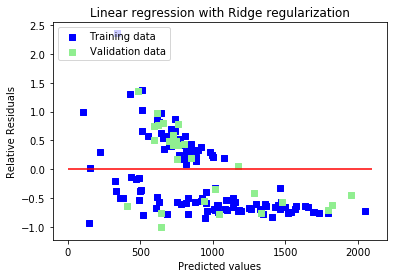

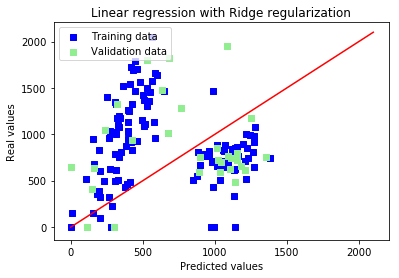

In [323]:
# Plot residuals
plt.scatter(y_train, (y_train_predicted - y_train)/y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, (y_test_predicted - y_test)/y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Relative Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -1, xmax = 2100, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_predicted, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_predicted, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([-1, 2100], [-1, 2100], c = "red")
plt.show()